# Palmer Penguins

This notebook contains my analysis of the famous Palmer Penguins dataset. This dataset contains measurements for three species of penguin (Adélie, Chinstrap, and Gentoo), which were observed on three islands (Biscoe, Dream, and Torgersen) in Antarctica's Palmer Archipelago.

The dataset was collected and compiled by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. Allison Horst [shared and maintains the dataset](https://allisonhorst.github.io/palmerpenguins/), with the aim of providing a great dataset for data exploration & visualisation, as an alternative to [the Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The dataset has been made available under a [CC-0 license](https://creativecommons.org/public-domain/cc0/) meaning it can freely be worked upon in the public domain.

## Reviewing the Dataset
I will begin by importing [pandas](https://pandas.pydata.org/) as a useful tool for data analysis and manipulation. I will then use pandas to read in the dataset and take a preliminary look. As I have not worked with this dataset before, I will take some time to familiarise myself with it before proceeding to any analysis. Since I will create plots later in my analysis, I'll also take the opportunity to import [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), [seaborn](https://seaborn.pydata.org/tutorial/introduction.html), and [numpy](https://numpy.org/) at the start too. I will set the [default visual Seaborn theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme) for the plots.

In [59]:
# Import packages for use in my analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn visual theme for plots
sns.set()

In [60]:
# I encountered 'FutureWarning: use_inf_as_na' which appears in Seaborn pairplot
# using Warnings module to disable this so the final notebook looks cleaner
# I will disable this for one final review once my notebook is complete to ensure no other warnings are missed
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the Penguins dataset and take a look
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset contains 344 rows, with each row corresponding to a unique penguin. I can see that for each penguin, the researchers captured seven variables:
- **species:** which of the three species (Adélie, Chinstrap, or Gentoo) the penguin belongs to
- **island:** which of the three islands (Biscoe, Dream, or Torgersen) the penguin was found on
- **bill_length_mm:** length (in mm) of the penguin's culmen (upper ridge of the penguin's bill)
- **bill_depth_mm:** depth (in mm) of the penguin's culmen
- **flipper_length_mm:** length (in mm) of the penguin's flipper
- **body_mass_g:** body mass (in g) of the penguin
- **sex:** whether the penguin was Female or Male - I find the capitalisation of **MALE** and **FEMALE** here to be distracting, so I'm going to convert these to lower case

I am going to use [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) to see the various datatypes in the dataframe, and I will then use the [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function to get a quick overview of some key data points for the numeric variables:

In [62]:
# Checking data types
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [63]:
# Cleaning sex column as I prefer to use proper case
df["sex"] = df["sex"].replace({'MALE': 'Male', 'FEMALE': 'Female'})

In [64]:
# Describe the dataset
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Looking at the **count** figures here, I can see that this data only corresponds to 342 of the penguins. Since there were 344 penguins initially, they must have been unable to get measurements for two of the penguins. I could have searched through the dataset to find where these entries appeared, but fortunately they appeared in the preview when I had initial look at the dataset, where the NaN ([not a number](https://www.turing.com/kb/nan-values-in-python)) values appear for rows **3** and **339**. I can see that qualitative data (specifically species and island) was still captured for these penguins, so I should keep in mind later in my analysis that any quantitative and qualitative counts may misalign by up to 2.

The table description above provided an overview of the four numeric variables. For the three remaining non-numeric variables, I will now get an idea of the proportional split among them by using the [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function to look at unique counts, and then using [axes.pie()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html) to generate piecharts to display the distributions at a glance.

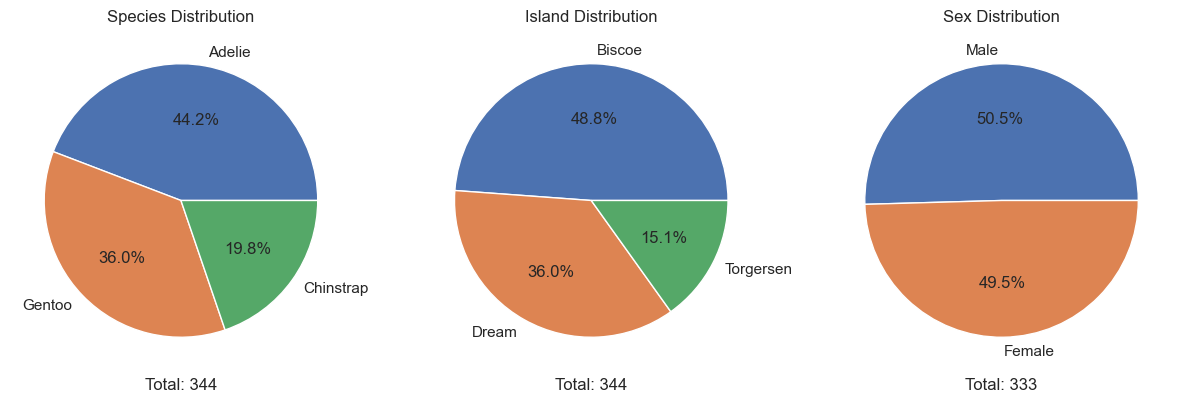

In [65]:
# Capture the variable counts
species_counts = df["species"].value_counts()
island_counts = df["island"].value_counts()
sex_counts = df["sex"].value_counts()

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the pie chart for species
axs[0].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
axs[0].set_title('Species Distribution')
axs[0].set_xlabel(f'Total: {sum(species_counts)}')

# Plotting the pie chart for island
axs[1].pie(island_counts, labels=island_counts.index, autopct='%1.1f%%')
axs[1].set_title('Island Distribution')
axs[1].set_xlabel(f'Total: {sum(island_counts)}')

# Plotting the pie chart for sex
axs[2].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
axs[2].set_title('Sex Distribution')
axs[2].set_xlabel(f'Total: {sum(sex_counts)}')

plt.show()

This is interesting - I can see that we have total counts for Species and Island, but we are missing Sex data for 11 of the penguins. We already know we are missing measurement data for two of the penguins, as seen in the describe function, and from the preview of the data frame we know we don't have Sex data for these penguins. This means that there are nine penguins for whom we have measurement data, but no Sex data. It might be an interesting experiment to see if we can make a prediction of the Sex of these penguins based on the measurement data that we have for them.

Let's create a dataframe with those penguins only, so we can take a separate look at them:

In [66]:
# create predict dataframe by filtering where Sex is NaN and where Bill Length is not NaN
topredict_df = df[(df['sex'].isnull()) & (df['bill_length_mm'].notnull())]
topredict_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


These are our nine candidates for analysis. They are stored in the **topredict_df** dataframe so I can return to take a look at them later.

I'm also going to create another dataframe that excludes these penguins, and the other two that have NaN values, so I can have a clean batch of data from which to draw correlations:

In [67]:
sex_df = df[(df['sex'].notnull())]
sex_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Impact of Sex and Species on Variables
Now I'm going to take at how penguin sex impacts each of the quantitative variables.

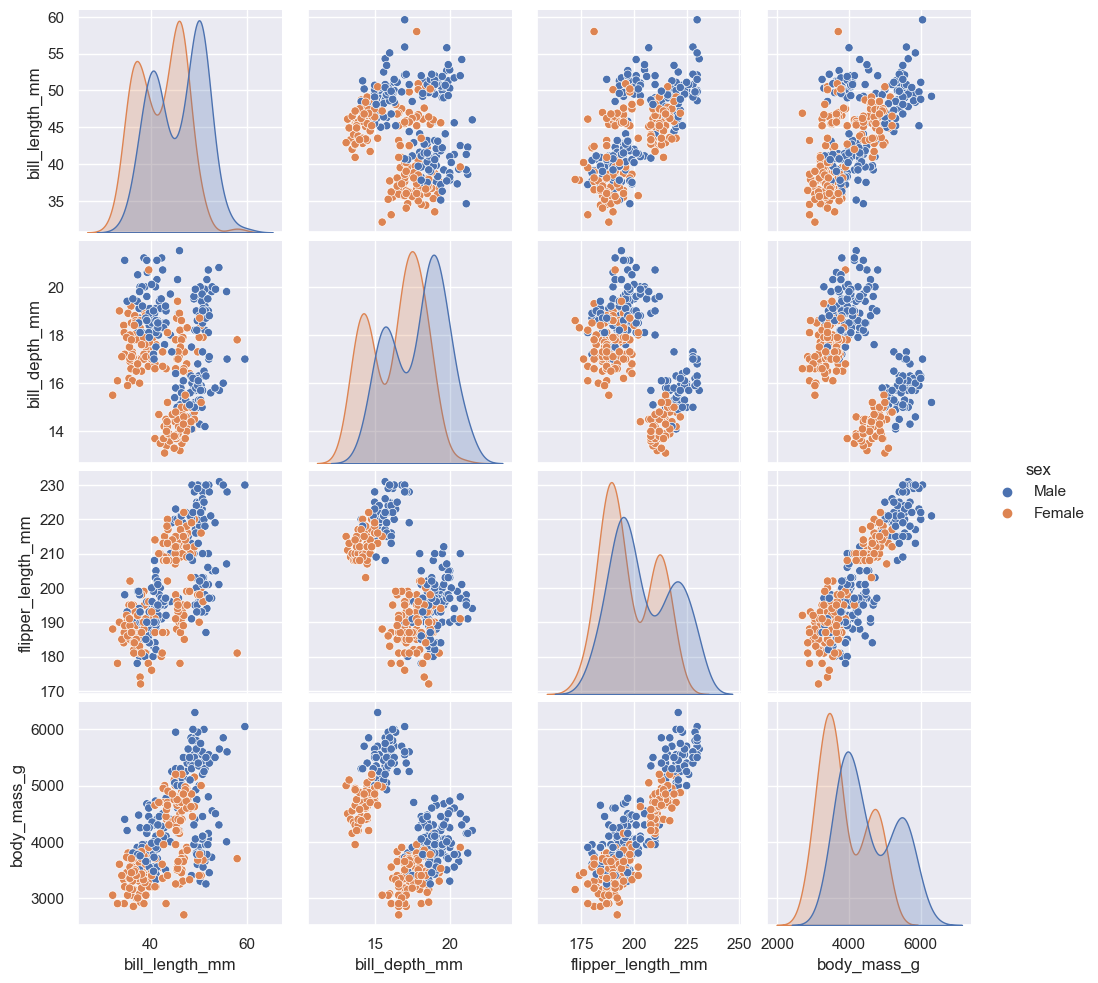

In [68]:
sns.pairplot(sex_df, hue="sex")

We can see that Male penguins have a tendency to track a bit larger across all variables, but even when we account for sex in the data, there seems to be quite a clear 'two peak' pattern. I expect that Species and Island are having a further impact on the data.

Let's break out the data further so we can take a look:

In [87]:
adelie_df = sex_df[sex_df['species'] == 'Adelie']
chinstrap_df = sex_df[sex_df['species'] == 'Chinstrap']
gentoo_df = sex_df[sex_df['species'] == 'Gentoo']

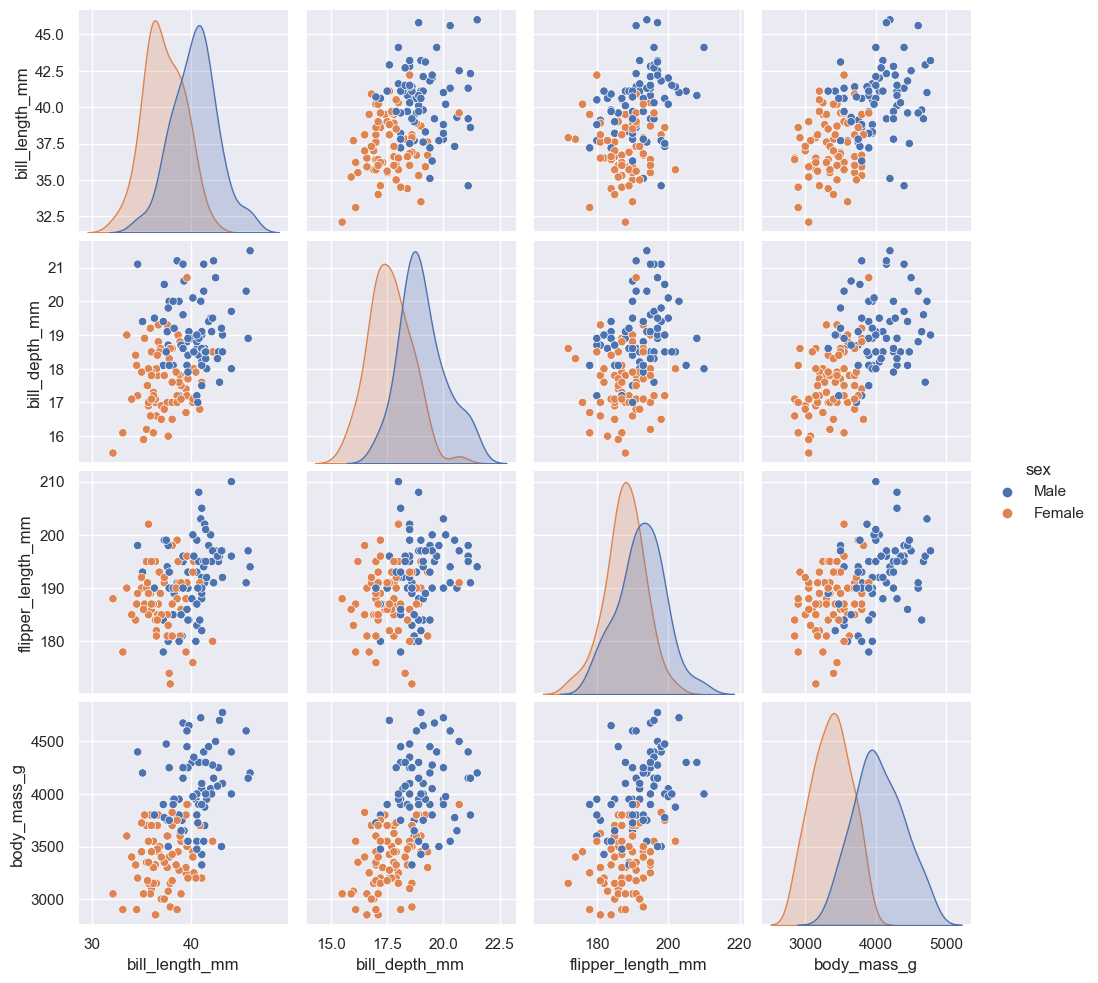

In [86]:
sns.pairplot(adelie_df, hue="sex")

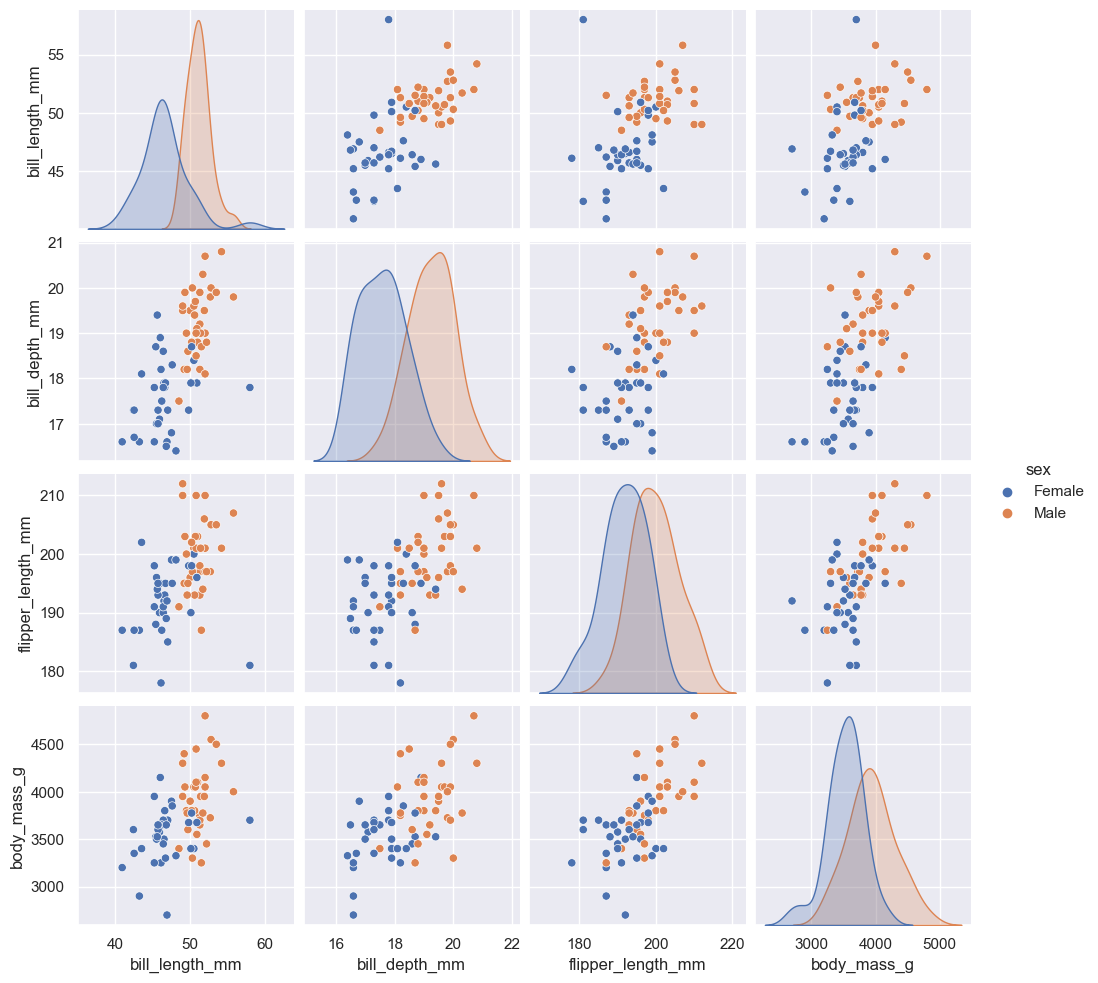

In [88]:
sns.pairplot(chinstrap_df, hue="sex")

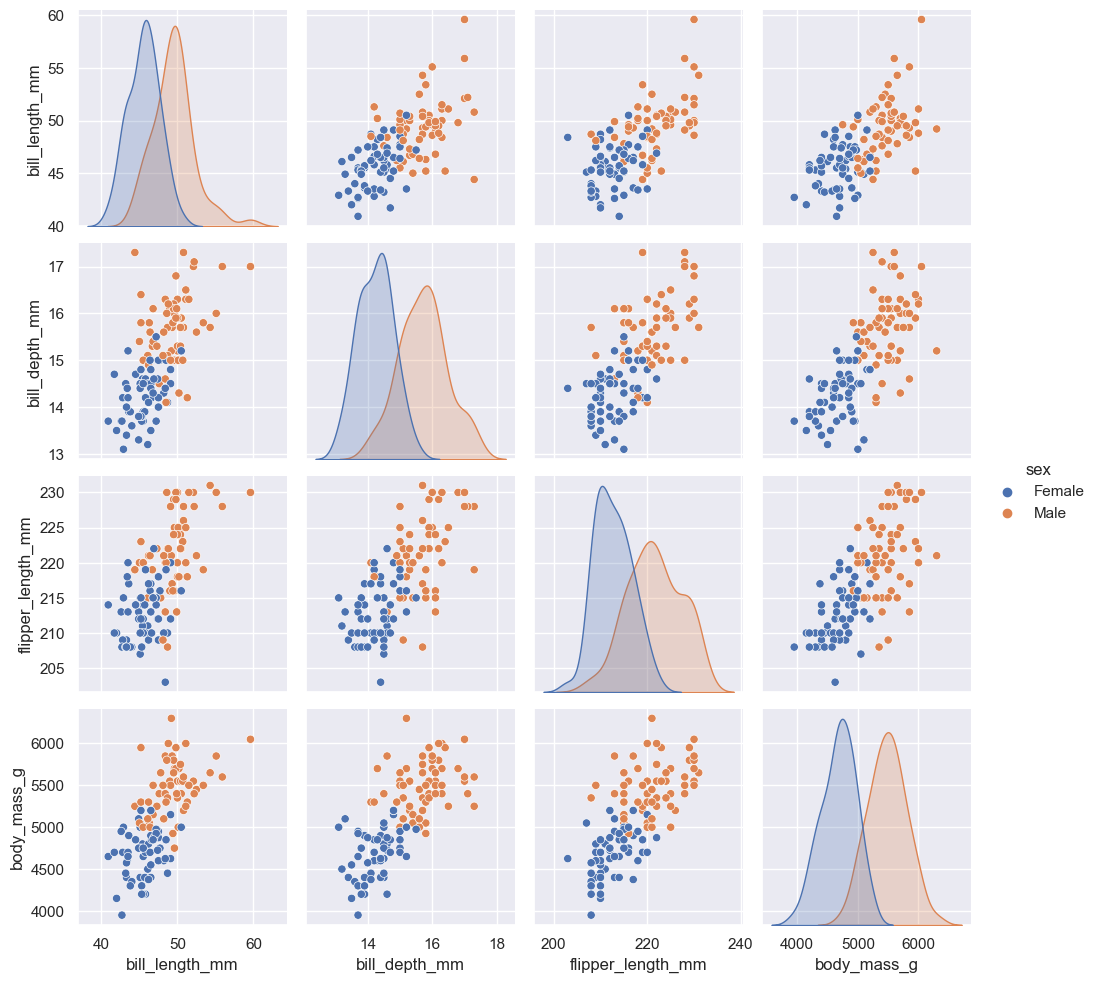

In [89]:
sns.pairplot(gentoo_df, hue="sex")

This is more in line with what we would expect to see. Accounting for sex and species, we see mostly typical bell curves appear in the data.

Now, I'm going to take a look at some correlations in this data to see if it can tell us anything predictive about penguin sex. I've chosen **bill_length_mm** and **bill_depth_mm** to check how they relate to each other.

## Correlations
I'm going to compare the bill measurements, accounting for sex and species, to see if the coefficients can be used to predict the sex of our as yet sexless penguins.

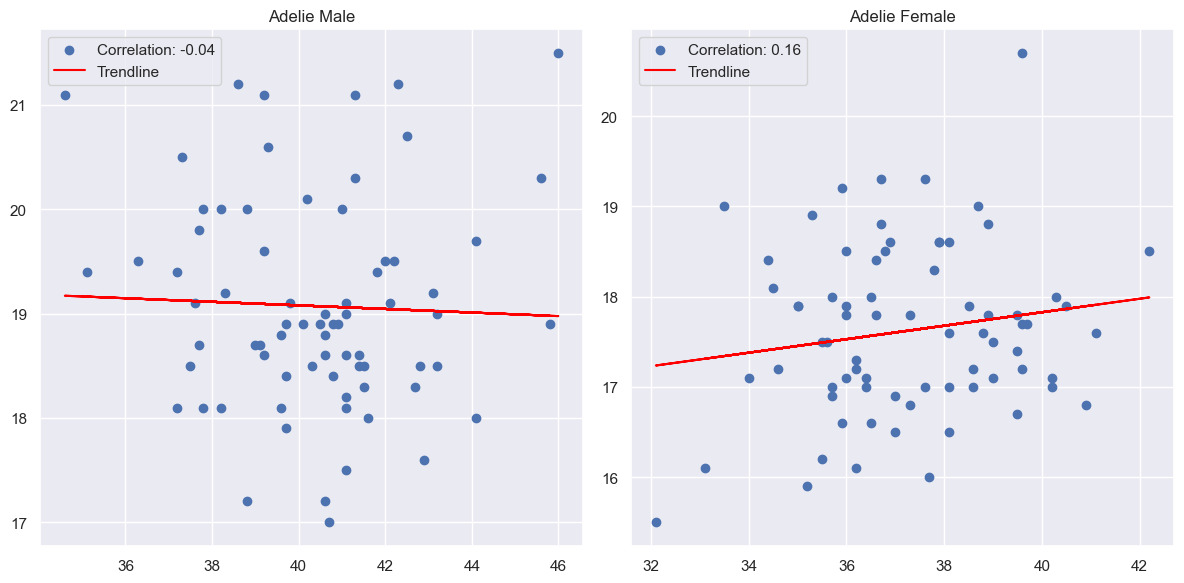

In [98]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Adelie Male subplot
male_df = adelie_df[adelie_df['sex'] == 'Male']
x_male = male_df['bill_length_mm']
y_male = male_df['bill_depth_mm']
axs[0].scatter(x_male, y_male)
m_male, b_male = np.polyfit(x_male, y_male, 1)
axs[0].plot(x_male, m_male * x_male + b_male, color='red', label='Trendline')
correlation_coefficient_male = np.corrcoef(x_male, y_male)[0, 1]
correlation_label_male = 'Correlation: {:.2f}'.format(correlation_coefficient_male)
axs[0].legend([correlation_label_male, 'Trendline'])
axs[0].set_title('Adelie Male')  # Set title for the subplot

# Adelie Female subplot
female_df = adelie_df[adelie_df['sex'] == 'Female']
x_female = female_df['bill_length_mm']
y_female = female_df['bill_depth_mm']
axs[1].scatter(x_female, y_female)
m_female, b_female = np.polyfit(x_female, y_female, 1)
axs[1].plot(x_female, m_female * x_female + b_female, color='red', label='Trendline')
correlation_coefficient_female = np.corrcoef(x_female, y_female)[0, 1]
correlation_label_female = 'Correlation: {:.2f}'.format(correlation_coefficient_female)
axs[1].legend([correlation_label_female, 'Trendline'])
axs[1].set_title('Adelie Female')  # Set title for the subplot

plt.tight_layout()  # Adjust layout
plt.show()

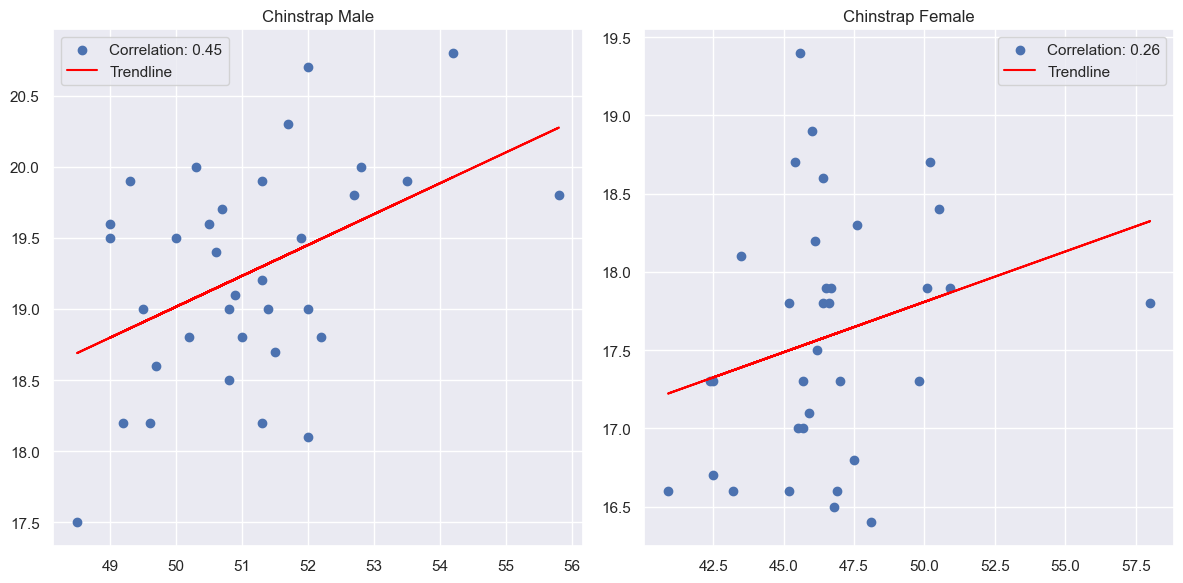

In [105]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Chinstrap Male subplot
male_df = chinstrap_df[chinstrap_df['sex'] == 'Male']
x_male = male_df['bill_length_mm']
y_male = male_df['bill_depth_mm']
axs[0].scatter(x_male, y_male)
m_male, b_male = np.polyfit(x_male, y_male, 1)
axs[0].plot(x_male, m_male * x_male + b_male, color='red', label='Trendline')
correlation_coefficient_male = np.corrcoef(x_male, y_male)[0, 1]
correlation_label_male = 'Correlation: {:.2f}'.format(correlation_coefficient_male)
axs[0].legend([correlation_label_male, 'Trendline'])
axs[0].set_title('Chinstrap Male')  # Set title for the subplot

# Chinstrap Female subplot
female_df = chinstrap_df[chinstrap_df['sex'] == 'Female']
x_female = female_df['bill_length_mm']
y_female = female_df['bill_depth_mm']
axs[1].scatter(x_female, y_female)
m_female, b_female = np.polyfit(x_female, y_female, 1)
axs[1].plot(x_female, m_female * x_female + b_female, color='red', label='Trendline')
correlation_coefficient_female = np.corrcoef(x_female, y_female)[0, 1]
correlation_label_female = 'Correlation: {:.2f}'.format(correlation_coefficient_female)
axs[1].legend([correlation_label_female, 'Trendline'])
axs[1].set_title('Chinstrap Female')  # Set title for the subplot

plt.tight_layout()  # Adjust layout
plt.show()


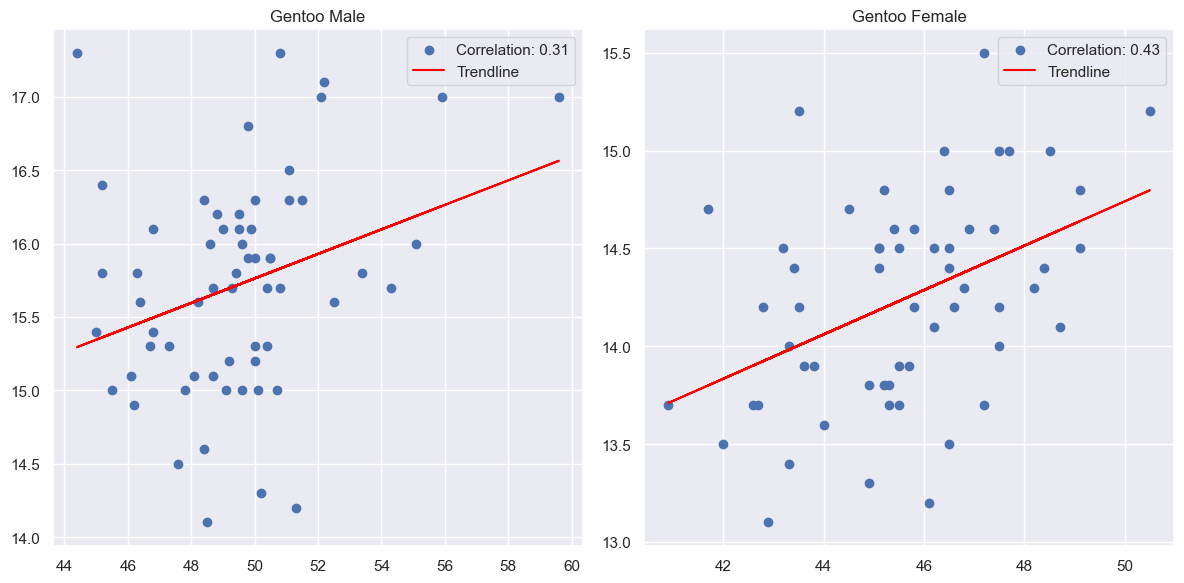

In [106]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gentoo Male subplot
male_df = gentoo_df[gentoo_df['sex'] == 'Male']
x_male = male_df['bill_length_mm']
y_male = male_df['bill_depth_mm']
axs[0].scatter(x_male, y_male)
m_male, b_male = np.polyfit(x_male, y_male, 1)
axs[0].plot(x_male, m_male * x_male + b_male, color='red', label='Trendline')
correlation_coefficient_male = np.corrcoef(x_male, y_male)[0, 1]
correlation_label_male = 'Correlation: {:.2f}'.format(correlation_coefficient_male)
axs[0].legend([correlation_label_male, 'Trendline'])
axs[0].set_title('Gentoo Male')  # Set title for the subplot

# Gentoo Female subplot
female_df = gentoo_df[gentoo_df['sex'] == 'Female']
x_female = female_df['bill_length_mm']
y_female = female_df['bill_depth_mm']
axs[1].scatter(x_female, y_female)
m_female, b_female = np.polyfit(x_female, y_female, 1)
axs[1].plot(x_female, m_female * x_female + b_female, color='red', label='Trendline')
correlation_coefficient_female = np.corrcoef(x_female, y_female)[0, 1]
correlation_label_female = 'Correlation: {:.2f}'.format(correlation_coefficient_female)
axs[1].legend([correlation_label_female, 'Trendline'])
axs[1].set_title('Gentoo Female')  # Set title for the subplot

plt.tight_layout()  # Adjust layout
plt.show()

**TEMPORARY - DELETE BEFORE SUBMISSION** 
Resources to be reviewed in the course of my analysis:

- https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2
- https://seaborn.pydata.org/generated/seaborn.pairplot.html

***

### End

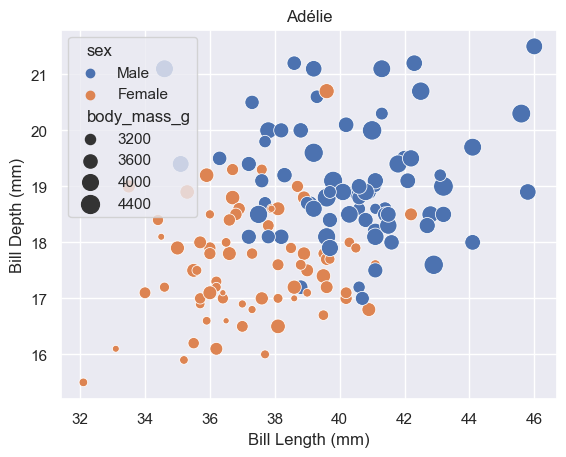

In [69]:
# assigning variables based on the datapoints I want to look at
ad_x = adelie_df['bill_length_mm']
ad_y = adelie_df['bill_depth_mm']
ad_hue = adelie_df['sex']
ad_size = adelie_df['body_mass_g']

# Scatter plot with color based on 'sex' and size based on 'body_mass_g'
sns.scatterplot(x=ad_x, y=ad_y, hue=ad_hue, size=ad_size, sizes=(20, 200), legend="brief")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Adélie')
plt.show()

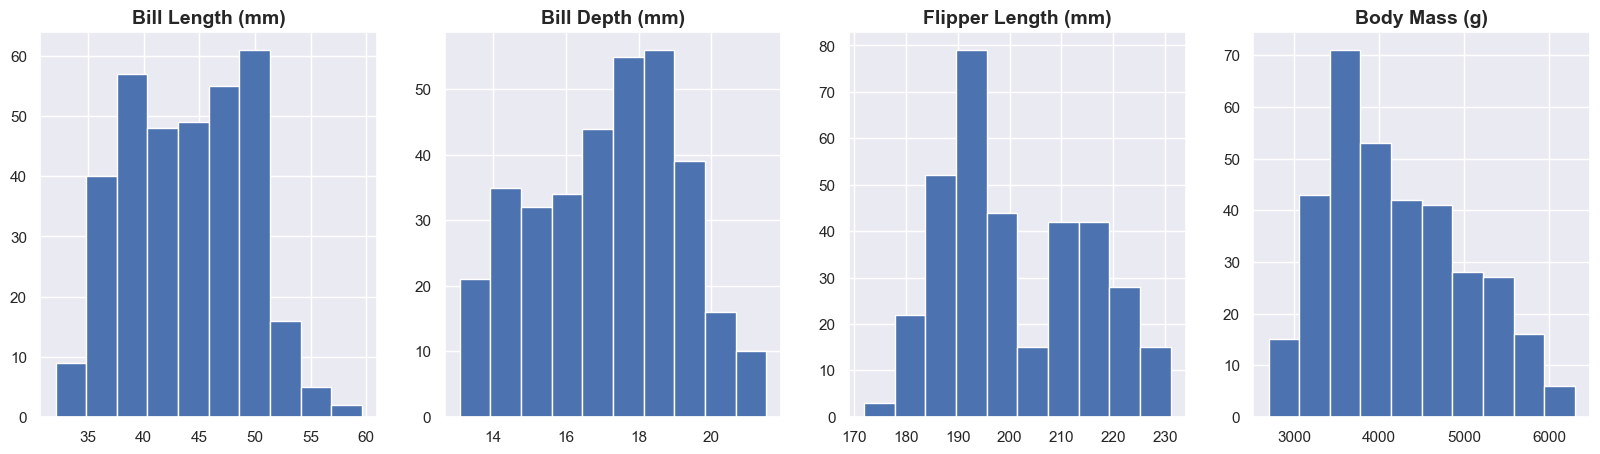

In [70]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plotting the histogram for bill_length_mm
axs[0].hist(df['bill_length_mm'])
axs[0].set_title('Bill Length (mm)', fontsize=14, fontweight='bold')

# Plotting the histogram for bill_depth_mm
axs[1].hist(df['bill_depth_mm'])
axs[1].set_title('Bill Depth (mm)', fontsize=14, fontweight='bold')

# Plotting the histogram for flipper_length_mm
axs[2].hist(df['flipper_length_mm'])
axs[2].set_title('Flipper Length (mm)', fontsize=14, fontweight='bold')

# Plotting the histogram for body_mass_g
axs[3].hist(df['body_mass_g'])
axs[3].set_title('Body Mass (g)', fontsize=14, fontweight='bold')

plt.show()